In [27]:
import fonctions
import pandas as pd
import matplotlib.pyplot as plt

df_players = pd.read_parquet('df_players.parquet')
df_players = df_players.reset_index()  # Indices alignés

n_last_matches=1

In [28]:
# Exemple : récupérer et visualiser les données sur les X derniers matchs
df_transfers = fonctions.get_recent_transfers(df_players, n_last_matches)

# Trier pour garder les plus gros mouvements
df_transfers_sorted = df_transfers.sort_values(by=['transfers_in', 'transfers_out'], ascending=False).head(50)

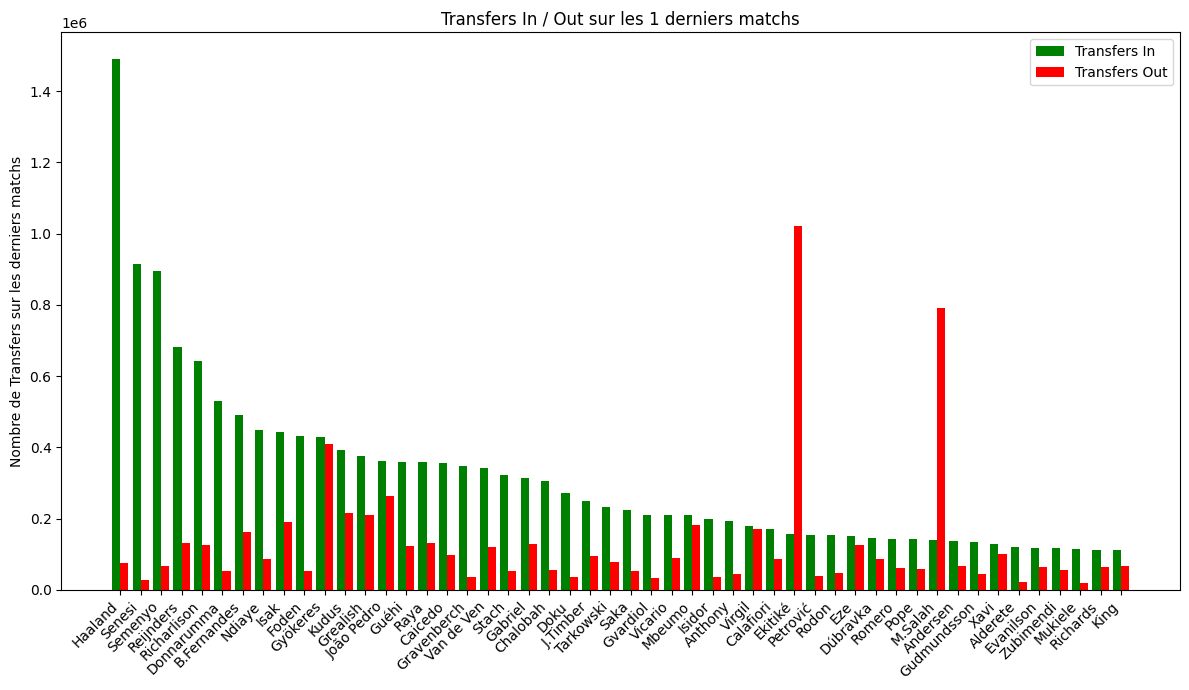

In [29]:
# Graphique Barres côte à côte
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.4
indices = range(len(df_transfers_sorted))

ax.bar(indices, df_transfers_sorted['transfers_in'], width=bar_width, label='Transfers In', color='green')
ax.bar([i + bar_width for i in indices], df_transfers_sorted['transfers_out'], width=bar_width, label='Transfers Out', color='red')

ax.set_xticks([i + bar_width / 2 for i in indices])
ax.set_xticklabels(df_transfers_sorted['web_name'], rotation=45, ha='right')

ax.set_ylabel('Nombre de Transfers sur les derniers matchs')
ax.set_title(f'Transfers In / Out sur les {n_last_matches} derniers matchs')
ax.legend()

plt.tight_layout()
plt.show()